In [30]:
import os
import pandas as pd
from Pyfhel import Pyfhel, PyPtxt, PyCtxt
from datetime import datetime
import numpy as np
import sys
import time
import matplotlib.pyplot as plt



path_brazil = "Homomorphic/Brazil/Brazil Export Import Information"
path_london = "Homomorphic/London/Smart meters in London"

# Encriptação Homomorfica
## Estatisticas retiradas
   - Media
   - Variancia
   - Mediana
   - Q1
   - Q3
   - IQR
   - Min
   - Max
   - Sum
   
Desta parte do projeto decidimos implementar uma classe com metodos que calculam as estatisticas enumeradas em cima.

Para tal guardamos os tempos das operações de modo a posteriormente fazer a sua análise.

## Searchable - Clusion 

In [31]:
# Processamento dos dados

temp_daily = pd.read_csv(path_london+'/weather_daily_darksky.csv').sort_values("temperatureMaxTime")
temp_daily

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
13,15.57,2011-11-01 15:00:00,208,partly-cloudy-day,10.13,2011-11-01 22:00:00,0.36,2.45,1009.46,2011-11-01 22:00:00,...,15.57,2011-11-01 06:54:29,2011-11-01 15:00:00,2011-11-01 10:00:00,Partly cloudy until evening.,2011-11-02 03:00:00,9.01,2011-11-01 15:00:00,2011-11-02 03:00:00,0.21
60,15.19,2011-11-02 23:00:00,134,partly-cloudy-night,10.23,2011-11-02 03:00:00,0.39,4.39,1004.79,2011-11-02 03:00:00,...,15.06,2011-11-02 06:56:16,2011-11-02 13:00:00,2011-11-02 09:00:00,Partly cloudy throughout the day.,2011-11-02 19:00:00,7.33,2011-11-02 23:00:00,2011-11-02 19:00:00,0.24
34,17.41,2011-11-03 14:00:00,154,partly-cloudy-day,13.39,2011-11-03 21:00:00,0.52,3.99,993.40,2011-11-03 21:00:00,...,17.41,2011-11-03 06:58:03,2011-11-03 14:00:00,2011-11-03 10:00:00,Partly cloudy throughout the day.,2011-11-04 07:00:00,12.79,2011-11-03 14:00:00,2011-11-04 07:00:00,0.27
31,15.54,2011-11-04 11:00:00,179,fog,12.03,2011-11-04 23:00:00,0.50,2.62,995.54,2011-11-04 23:00:00,...,15.54,2011-11-04 06:59:49,2011-11-04 11:00:00,2011-11-04 10:00:00,Foggy overnight.,2011-11-05 02:00:00,11.53,2011-11-04 11:00:00,2011-11-05 02:00:00,0.31
46,13.94,2011-11-05 15:00:00,346,fog,10.96,2011-11-05 02:00:00,0.65,2.70,1007.39,2011-11-05 02:00:00,...,13.94,2011-11-05 07:01:36,2011-11-05 15:00:00,2011-11-05 10:00:00,Foggy in the morning.,2011-11-06 05:00:00,10.17,2011-11-05 15:00:00,2011-11-06 06:00:00,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,10.04,2014-03-27 13:00:00,75,fog,2.08,2014-03-27 05:00:00,0.44,2.36,1012.88,2014-03-27 06:00:00,...,10.04,2014-03-27 05:48:40,2014-03-27 13:00:00,2014-03-27 13:00:00,Foggy overnight.,2014-03-28 03:00:00,0.62,2014-03-27 13:00:00,2014-03-28 03:00:00,0.88
876,12.43,2014-03-28 14:00:00,87,fog,3.67,2014-03-28 03:00:00,0.19,3.31,1014.82,2014-03-28 03:00:00,...,12.43,2014-03-28 05:46:23,2014-03-28 14:00:00,2014-03-28 11:00:00,Foggy in the morning.,2014-03-29 01:00:00,1.69,2014-03-28 14:00:00,2014-03-29 02:00:00,0.92
867,18.47,2014-03-29 14:00:00,105,clear-day,5.37,2014-03-29 01:00:00,0.08,4.19,1014.25,2014-03-29 02:00:00,...,18.47,2014-03-29 05:44:05,2014-03-29 14:00:00,2014-03-29 12:00:00,Clear throughout the day.,2014-03-30 05:00:00,5.41,2014-03-29 14:00:00,2014-03-30 04:00:00,0.96
830,19.82,2014-03-30 12:00:00,114,partly-cloudy-day,5.81,2014-03-30 05:00:00,0.31,2.18,1013.04,2014-03-30 04:00:00,...,19.82,2014-03-30 05:41:48,2014-03-30 12:00:00,2014-03-30 11:00:00,"Mostly cloudy starting in the afternoon, conti...",2014-03-31 06:00:00,8.14,2014-03-30 12:00:00,2014-03-31 06:00:00,0.99


In [32]:
# Processamento dos dados

pd.set_option('display.max_columns', None)
format_string = "%Y-%m-%d"
format_string_m_h_s = "%Y-%m-%d %H:%M:%S"
temp_daily["date"] = list(map(lambda date: datetime.strptime(date.split(" ")[0], format_string),temp_daily["temperatureMaxTime"]))
temp_daily["sunriseDate"] = list(map(lambda date: datetime.strptime(date, format_string_m_h_s).hour*60 + datetime.strptime(date, format_string_m_h_s).minute ,temp_daily["sunriseTime"]))
temp_daily["sunsetDate"] = list(map(lambda date: datetime.strptime(date, format_string_m_h_s).hour*60 + datetime.strptime(date, format_string_m_h_s).minute ,temp_daily["sunsetTime"]))
temp_daily = temp_daily.dropna()
filtered_data =  temp_daily[["date","temperatureMax","temperatureMin","sunriseDate","sunsetDate","humidity", "pressure","windSpeed"]]

In [33]:
covid_data = pd.read_csv("full_grouped.csv")

In [34]:
class homomorphic_encryption():
    def __init__(self, array):
        
        # Gerar chaves
        self.HE = Pyfhel()        
        self.HE.contextGen(p=65537) 
        self.HE.keyGen()
        
        # animacao de loading
        self.loading_animation = ['|', '/', '-', '\\']
        
        # array encriptado
        self.encrypt_data = self._encrypt_array(np.sort(np.array(array)))
                
        # tamanho do dados
        self.size = len(array)
        
        # estatisticas
        self.max = -1
        self.min = -1
        self.mean = -1
        self.sum = -1
        self.variance = -1
        
        # Arrays de tempos de execução
        self.time_sum = []
        self.time_max = []
        self.time_min = []
        self.time_variance = []
        self.x_plot = list(range(10,self.size,50))
    
    # Metodo que arredonda os dados encriptados
    def round_encryped(n,d):
        return ar.HE.encryptFrac(round(ar.HE.decryptFrac(n),d))

    # Este metodo percorre os dados raw e encripta-os
    def _encrypt_array(self,original_data):
        print("[LOAD ARRAY]\n")
        start_t = time.time()
        encrypt_data = []
        size = len(original_data)
        for i,elem in enumerate(original_data):
            sys.stdout.flush()
            sys.stdout.write("\rLoading "+self.loading_animation[i%4]+" ["+str(i+1)+"/"+str(size)+"]")
            encrypt_data.append(self.HE.encryptFrac(elem))
        sys.stdout.flush()
        sys.stdout.write("\rDone! - ["+str(size)+"/"+str(size)+"]")
        end_t = time.time()
        print("\nTime Elapsed: "+str(round(end_t - start_t,4))+" seconds!")
        return encrypt_data
        
    # Metodo para calcular a mediana
    def calculate_median(self):
        if self.size%2 == 1:
            return self.encrypt_data[self.size//2]
        else:
            aux = self.HE.encryptFrac(1/2)
            return (self.encrypt_data[self.size//2] + self.encrypt_data[self.size//2-1])*aux
    
    # Metodo para calcular a Q1
    def calculate_Q1(self):
        if self.size%4 == 1:
            return self.encrypt_data[self.size//4]
        else:
            aux = self.HE.encryptFrac(1/2)
            return (self.encrypt_data[self.size//4] + self.encrypt_data[self.size//4-1])*aux
    
    # Metodo para calcular a Q3
    def calculate_Q3(self):
        if self.size%4 == 1:
            return self.encrypt_data[self.size//4+self.size//2]
        else:
            aux = self.HE.encryptFrac(1/2)
            return (self.encrypt_data[self.size//4+self.size//2] + self.encrypt_data[self.size//4-1+self.size//2])*aux
    
    # Metodo para calcular a valor maximo
    def calculate_max(self):
        print("[CALCULATE MAX]")
        start_t = time.time()
        self.max = self.HE.encryptFrac(-1.0)
        for i,elem in enumerate(self.encrypt_data[:self.size]):
            sys.stdout.flush()
            sys.stdout.write("\rLoading "+self.loading_animation[i%4]+" ["+str(i+1)+"/"+str(self.size)+"]")
            if self.HE.decryptFrac(self.max - elem)<0:
                self.max = elem
        end_t = time.time()
        print("\nTime Elapsed: "+str(round(end_t - start_t,4))+" seconds!")
        return round(end_t - start_t,4)
    
    # Metodo para calcular o valor minimo
    def calculate_min(self):
        print("[CALCULATE MIN]")
        start_t = time.time()
        self.min = self.HE.encryptFrac(999999.0)
        for i,elem in enumerate(self.encrypt_data[:self.size]):
            sys.stdout.flush()
            sys.stdout.write("\rLoading "+self.loading_animation[i%4]+" ["+str(i+1)+"/"+str(self.size)+"]")
            if self.HE.decryptFrac(self.min - elem) > 0:
                self.min = elem
        end_t = time.time()
        print("\nTime Elapsed: "+str(round(end_t - start_t,4))+" seconds!")
        return round(end_t - start_t,4)
    
    # Metodo para calcular a soma do array
    def calculate_sum(self):
        print("[CALCULATE SUM]")
        start_t = time.time()
        tot = self.HE.encryptFrac(0.0)
        for i,elem in enumerate(self.encrypt_data[:self.size]):
            sys.stdout.flush()
            sys.stdout.write("\rLoading "+self.loading_animation[i%4]+" ["+str(i+1)+"/"+str(self.size)+"]")
            tot = tot + elem
        self.sum = self.HE.encryptFrac(round(self.HE.decryptFrac(tot),2))
        end_t = time.time()
        print("\nTime Elapsed: "+str(round(end_t - start_t,4))+" seconds!")
        return round(end_t - start_t,4)
    
    # Metodo para calcular a media
    def calculate_mean(self):
        print("[CALCULATE MEAN]")
        start_t = time.time()
        tot = self.sum
        size_encr = self.HE.encryptFrac(1.0/float(self.size))
        self.mean = tot*size_encr
        end_t = time.time()
        print("\nTime Elapsed: "+str(round(end_t - start_t,4))+" seconds!")
        return round(end_t - start_t,4)
    
    # Metodo para calcular a variancia
    def calculate_variance(self):
        print("[CALCULATE VARIANCE]")
        start_t = time.time()
        if self.mean == -1:
            self.calculate_mean()
        self.mean = round_encryped(self.mean,2)
        tot = self.HE.encryptFrac(0.0)
        for i,elem in enumerate(self.encrypt_data[:self.size]):
            sys.stdout.flush()
            sys.stdout.write("\rLoading "+self.loading_animation[i%4]+" ["+str(i+1)+"/"+str(self.size)+"]")
            diff = round_encryped((elem-mean),2)
            tot = round_encryped(tot + diff*diff,2)
        size_encr = self.HE.encryptFrac(1.0/float(self.size))
        self.variance = tot*size_encr
        end_t = time.time()
        print("\nTime Elapsed: "+str(round(end_t - start_t,4))+" seconds!")
        return round(end_t - start_t,4)
    
    # Metodo gerar os arrays com os tempos
    def generate_times(self):
        self.time_sum = []
        self.time_max = []
        self.time_min = []
        act_size = self.size
        for i in range(10,self.size,50):
            print("CALCULATE FOR LEN - ",str(i))
            self.size = i
            self.time_sum.append(self.calculate_sum())
            self.time_max.append(self.calculate_max())
            self.time_min.append(self.calculate_min())
            
        self.size = act_size
    
    # Metodo para dar plots
    def plot_times(self):
        
        plt.figure()
        plt.scatter(self.x_plot,self.time_sum)
        plt.plot(self.x_plot,self.time_sum)
        plt.xlabel("Size Data")
        plt.ylabel("Time in seconds")
        plt.title("Calculate Sum")
        plt.show()
        
        plt.figure()
        plt.scatter(self.x_plot,self.time_max)
        plt.plot(self.x_plot,self.time_max)
        plt.xlabel("Size Data")
        plt.ylabel("Time in seconds")
        plt.title("Find max value Data")
        plt.show()
        
        plt.figure()
        plt.scatter(self.x_plot,self.time_min)
        plt.plot(self.x_plot,self.time_min)
        plt.xlabel("Size Data")
        plt.ylabel("Time in seconds")
        plt.title("Find min value Data")
        plt.show()
        

        
    # Metodo que retorna as estatisticas todas extraidas
    def get_all_statistics_decrypted(self):
        start_t = time.time()
        if(self.max == -1):
            print("Max not yet calculated, call method calculate_max() to get this statistic\n")
        else:
            print("MAX -> ",round(self.HE.decryptFrac(self.max),2),"\n")
        if(self.min == -1):
            print("Min not yet calculated, call method calculate_min() to get this statistic\n")
        else:
            print("MIN -> ",round(self.HE.decryptFrac(self.min),2),"\n")
        if(self.mean == -1):
            print("Mean not yet calculated, call method calculate_mean() to get this statistic\n")
        else:
            print("MEAN -> ",round(self.HE.decryptFrac(self.mean),2),"\n")
        if(self.sum == -1):
            print("Sum not yet calculated, call method calculate_sum() to get this statistic\n")
        else:
            print("SUM -> ",round(self.HE.decryptFrac(self.sum),2),"\n")
        if(self.variance == -1):
            print("Variance not yet calculated, call method calculate_variance() to get this statistic\n")
        else:
            print("VARIANCE -> ",round(self.HE.decryptFrac(self.variance),2),"\n")
      
        print("Median -> ",round(self.HE.decryptFrac(self.calculate_median()),2),"\n")
        
        print("First Quartile -> ",round(self.HE.decryptFrac(self.calculate_Q1()),2),"\n")
        
        print("Third Quartile -> ",round(self.HE.decryptFrac(self.calculate_Q3()),2),"\n")
        
        print("Inter-Quartile Range -> ",round(self.HE.decryptFrac(self.calculate_Q3() - self.calculate_Q1()),2),"\n")
        
        end_t = time.time()
        print("\nTime Elapsed: "+str(round(end_t - start_t,4))+" seconds!")

    
# Criação do objeto da classe
ar = homomorphic_encryption(covid_data["New cases"])

[LOAD ARRAY]

Loading | [181/35156]

KeyboardInterrupt: 

In [ ]:
ar.get_all_statistics_decrypted()

In [ ]:
ar.calculate_max()

In [ ]:
ar.calculate_min()

In [ ]:
ar.calculate_sum()

In [ ]:
mean = ar.calculate_mean()

In [ ]:
#aux = ar.calculate_variance()

In [ ]:
ar.get_all_statistics_decrypted()

In [29]:
ar.generate_times()

CALCULATE FOR LEN -  10
[CALCULATE SUM]
Loading / [10/10]
Time Elapsed: 0.0897 seconds!
[CALCULATE MAX]
Loading / [10/10]
Time Elapsed: 0.0416 seconds!
[CALCULATE MIN]
Loading / [10/10]
Time Elapsed: 0.0594 seconds!
CALCULATE FOR LEN -  60
[CALCULATE SUM]
Loading \ [60/60]
Time Elapsed: 0.1652 seconds!
[CALCULATE MAX]
Loading \ [60/60]
Time Elapsed: 0.2039 seconds!
[CALCULATE MIN]
Loading \ [60/60]
Time Elapsed: 0.1893 seconds!
CALCULATE FOR LEN -  110
[CALCULATE SUM]
Loading / [110/110]
Time Elapsed: 0.2143 seconds!
[CALCULATE MAX]
Loading / [110/110]
Time Elapsed: 0.3964 seconds!
[CALCULATE MIN]
Loading / [110/110]
Time Elapsed: 0.4614 seconds!
CALCULATE FOR LEN -  160
[CALCULATE SUM]
Loading \ [160/160]
Time Elapsed: 0.4681 seconds!
[CALCULATE MAX]
Loading \ [160/160]
Time Elapsed: 0.4644 seconds!
[CALCULATE MIN]
Loading \ [160/160]
Time Elapsed: 0.3827 seconds!
CALCULATE FOR LEN -  210
[CALCULATE SUM]
Loading / [210/210]
Time Elapsed: 0.4993 seconds!
[CALCULATE MAX]
Loading / [210/

Loading / [1810/1810]
Time Elapsed: 5.062 seconds!
[CALCULATE MIN]
Loading / [1810/1810]
Time Elapsed: 4.0871 seconds!
CALCULATE FOR LEN -  1860
[CALCULATE SUM]
Loading \ [1860/1860]
Time Elapsed: 3.0777 seconds!
[CALCULATE MAX]
Loading \ [1860/1860]
Time Elapsed: 4.829 seconds!
[CALCULATE MIN]
Loading \ [1860/1860]
Time Elapsed: 4.1702 seconds!
CALCULATE FOR LEN -  1910
[CALCULATE SUM]
Loading / [1910/1910]
Time Elapsed: 4.1486 seconds!
[CALCULATE MAX]
Loading / [1910/1910]
Time Elapsed: 4.7524 seconds!
[CALCULATE MIN]
Loading / [1910/1910]
Time Elapsed: 4.0336 seconds!
CALCULATE FOR LEN -  1960
[CALCULATE SUM]
Loading \ [1960/1960]
Time Elapsed: 3.5033 seconds!
[CALCULATE MAX]
Loading \ [1960/1960]
Time Elapsed: 4.4228 seconds!
[CALCULATE MIN]
Loading \ [1960/1960]
Time Elapsed: 4.9323 seconds!
CALCULATE FOR LEN -  2010
[CALCULATE SUM]
Loading / [2010/2010]
Time Elapsed: 3.7123 seconds!
[CALCULATE MAX]
Loading / [2010/2010]
Time Elapsed: 4.7047 seconds!
[CALCULATE MIN]
Loading / [201

KeyboardInterrupt: 

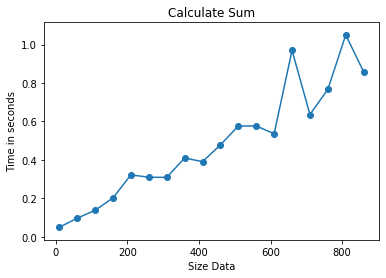

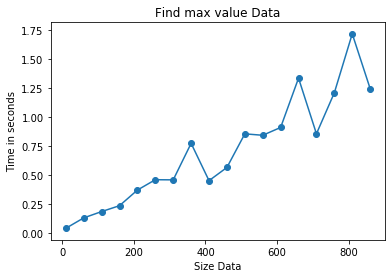

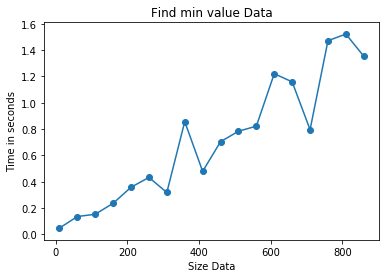

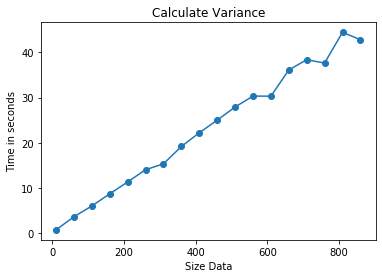

In [434]:
ar.plot_times()

In [ ]:
def round_encryped(n,d):
    return ar.HE.encryptFrac(round(ar.HE.decryptFrac(n),d))

In [260]:
soma = ar.HE.encryptFrac(0.0)
for elem in ar.encrypt_data:
    a = round_encryped((elem-mean),2)
    soma = round_encryped(soma + a*a,2)
    
ar.HE.decryptFrac(soma)

33671.679999999935

In [394]:
ar.time_sum
ar.time_max
ar.time_min
ar.time_variance

[0.5601,
 2.8503,
 5.11,
 7.3712,
 9.6958,
 11.9027,
 14.1593,
 16.4539,
 18.968,
 21.3066,
 23.8865,
 26.0365,
 28.842,
 30.643,
 33.7667,
 35.4744,
 37.2859,
 36.6301]

In [396]:
x =list(range(10,881,50))

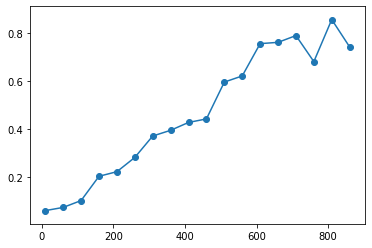

In [406]:
import matplotlib.pyplot as plt

plt.scatter(x,ar.time_sum)
plt.plot(x,ar.time_sum)
plt.show()

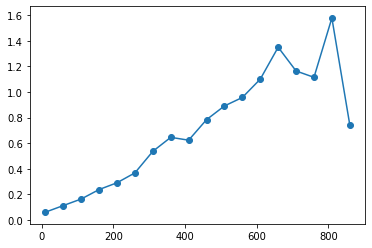

In [407]:
plt.scatter(x,ar.time_max)
plt.plot(x,ar.time_max)
plt.show()

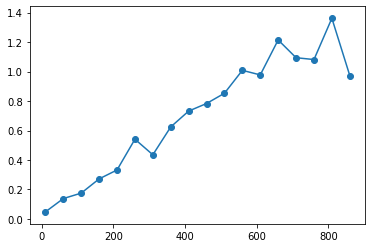

In [409]:
plt.scatter(x,ar.time_min)
plt.plot(x,ar.time_min)
plt.show()

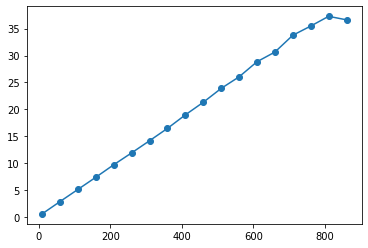

In [410]:
plt.scatter(x,ar.time_variance)
plt.plot(x,ar.time_variance)
plt.show()

0          0
1          0
2          0
3          0
4          0
        ... 
35151    152
35152      0
35153     10
35154     71
35155    192
Name: New cases, Length: 35156, dtype: int64